In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
from glob import glob
import joypy


def load_and_add_model(path):
    data = pd.read_csv(path)
    data["model"] = path.split("/")[-1].split(".")[0]
    return data


df = pd.concat(
    [load_and_add_model(path) for path in glob("../data/processed/*.csv") if "baseline" not in path]
)

In [2]:
baseline = pd.concat(
    [load_and_add_model(path) for path in glob("../data/processed/*.csv") if "baseline" in path]
)

lexical diversity
WilcoxonResult(statistic=np.float64(1919319.5), pvalue=np.float64(1.6788613575525763e-11))


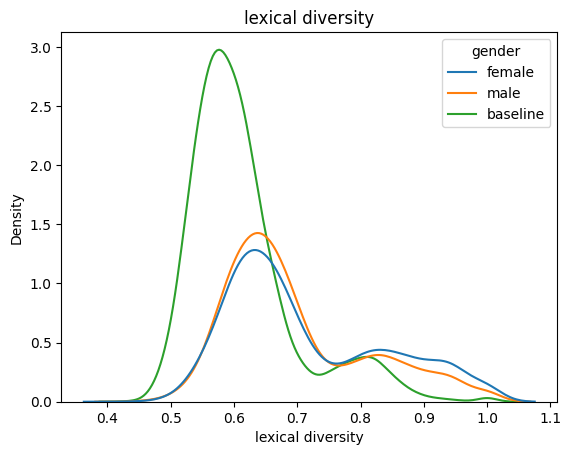

reading difficulty
WilcoxonResult(statistic=np.float64(1840823.0), pvalue=np.float64(3.208331465666865e-14))


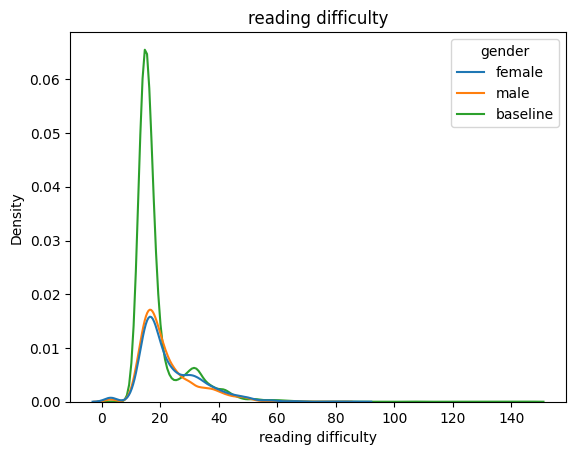

analytical
WilcoxonResult(statistic=np.float64(nan), pvalue=np.float64(nan))


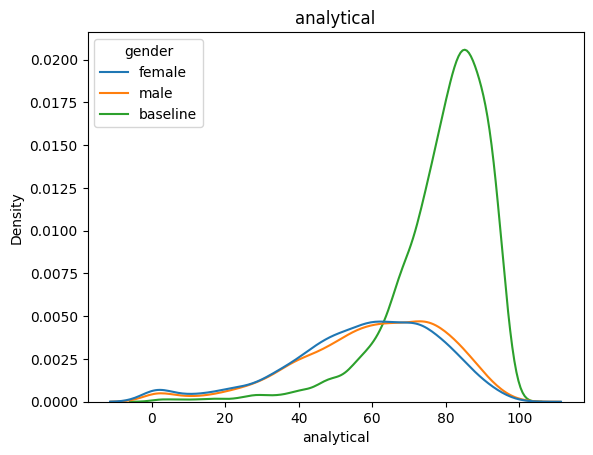

self references
WilcoxonResult(statistic=np.float64(2054682.5), pvalue=np.float64(0.00014113986578051405))


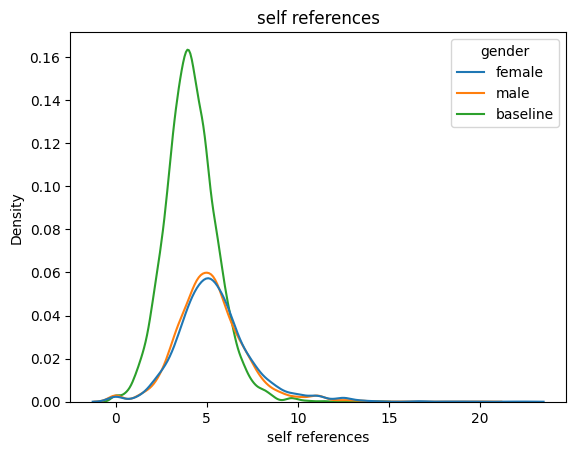

certainty
WilcoxonResult(statistic=np.float64(793673.5), pvalue=np.float64(3.567227494123318e-05))


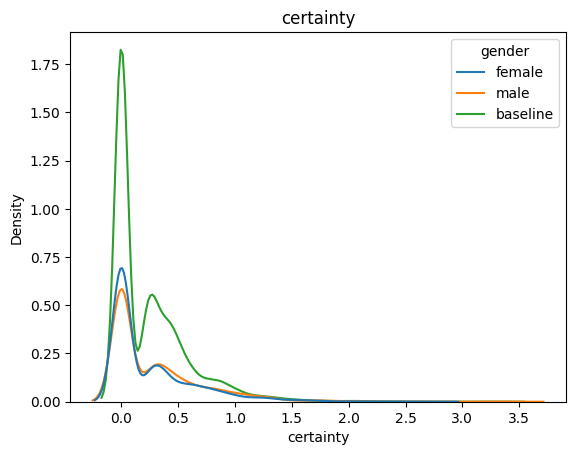

emotionality
WilcoxonResult(statistic=np.float64(2134788.5), pvalue=np.float64(0.27712286065653347))


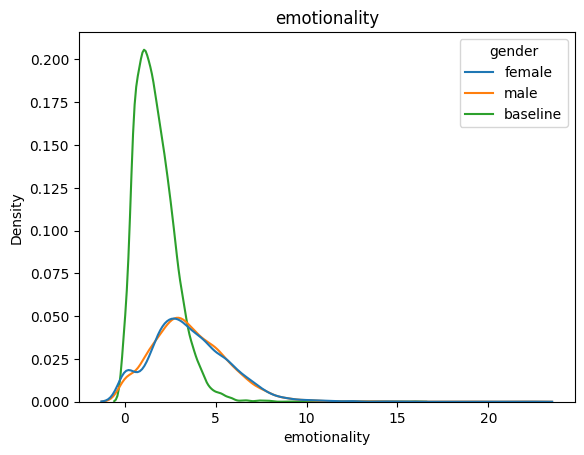

In [3]:
emotional = df[df["type"] == "emotional"]
baseline["gender"] = "baseline"
emotional = pd.concat([emotional, baseline], ignore_index=True)
for measure in (
    "lexical diversity",
    "reading difficulty",
    "analytical",
    "self references",
    "certainty",
    "emotionality",
):
    print(measure)
    print(
        wilcoxon(
            emotional[emotional["gender"] == "male"][measure],
            emotional[emotional["gender"] == "female"][measure],
        )
    )
    sns.kdeplot(emotional, x=measure, hue="gender")
    plt.title(measure)
    plt.show()

lexical diversity
WilcoxonResult(statistic=np.float64(1530407.0), pvalue=np.float64(8.580016854567013e-51))


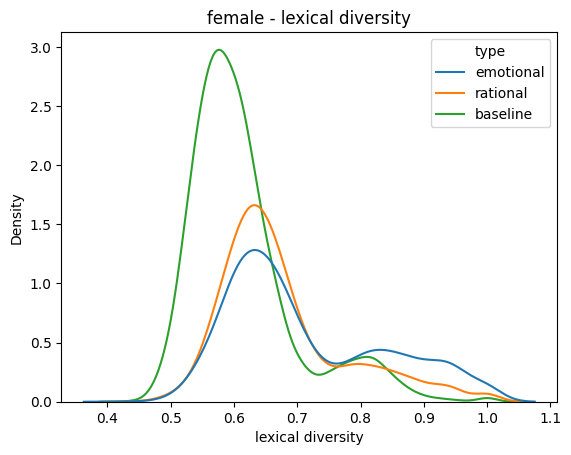

reading difficulty
WilcoxonResult(statistic=np.float64(1517241.5), pvalue=np.float64(2.2679147000471474e-48))


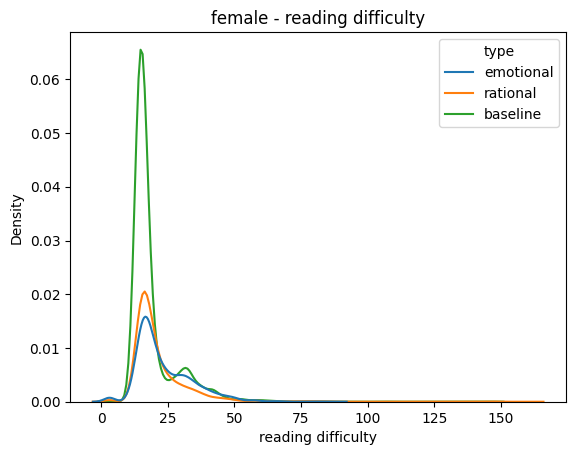

analytical
WilcoxonResult(statistic=np.float64(nan), pvalue=np.float64(nan))


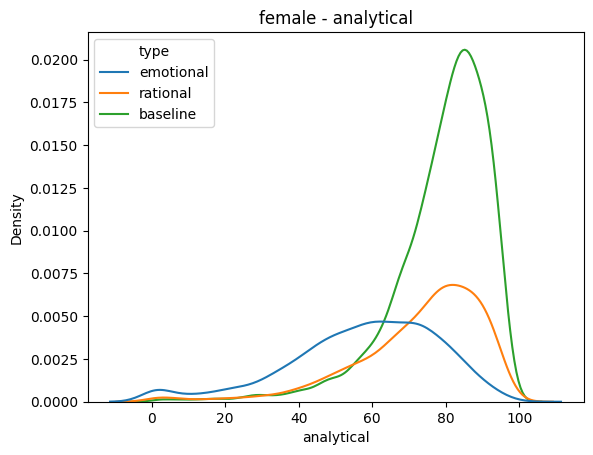

self references
WilcoxonResult(statistic=np.float64(1548002.5), pvalue=np.float64(1.8467024091686973e-47))


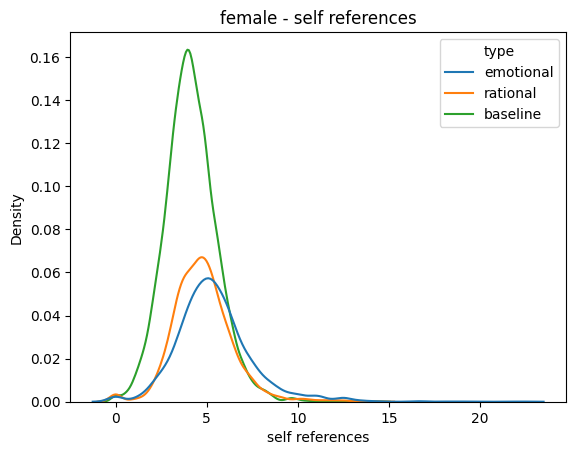

certainty
WilcoxonResult(statistic=np.float64(772849.0), pvalue=np.float64(1.2942041245282145e-05))


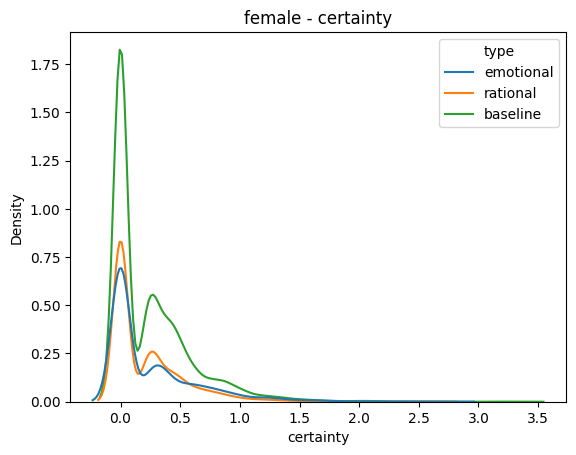

emotionality
WilcoxonResult(statistic=np.float64(449050.5), pvalue=np.float64(1.2223659805915577e-308))


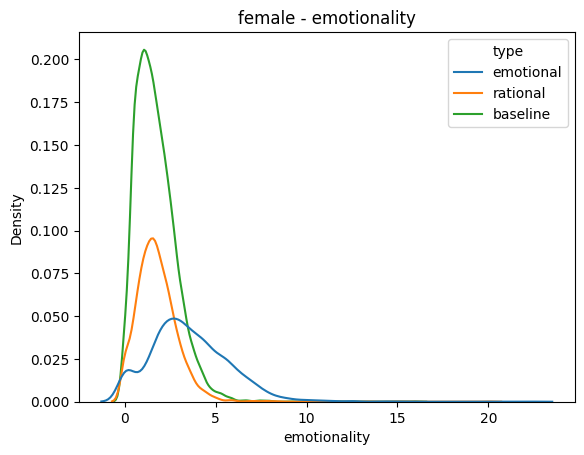

In [8]:
female = df[df["gender"] == "female"]
baseline["type"] = "baseline"
female = pd.concat([female, baseline], ignore_index=True)
for measure in (
    "lexical diversity",
    "reading difficulty",
    "analytical",
    "self references",
    "certainty",
    "emotionality",
):
    print(measure)
    print(
        wilcoxon(
            female[female["type"] == "rational"][measure],
            female[female["type"] == "emotional"][measure],
        )
    )
    sns.kdeplot(female, x=measure, hue="type")
    plt.title(f"female - {measure}")
    plt.show()

lexical diversity
WilcoxonResult(statistic=np.float64(1426882.0), pvalue=np.float64(2.2918741462202188e-67))


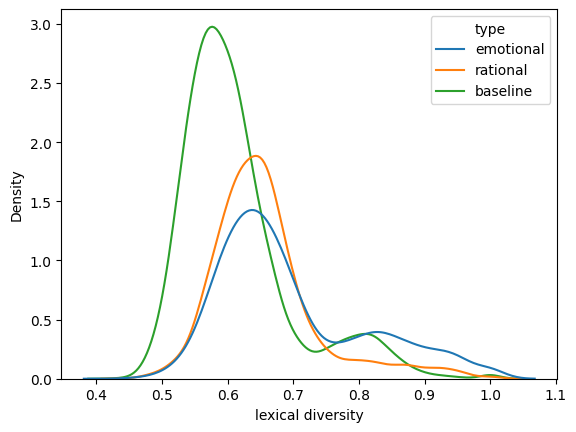

reading difficulty
WilcoxonResult(statistic=np.float64(1428960.5), pvalue=np.float64(5.342253879439138e-66))


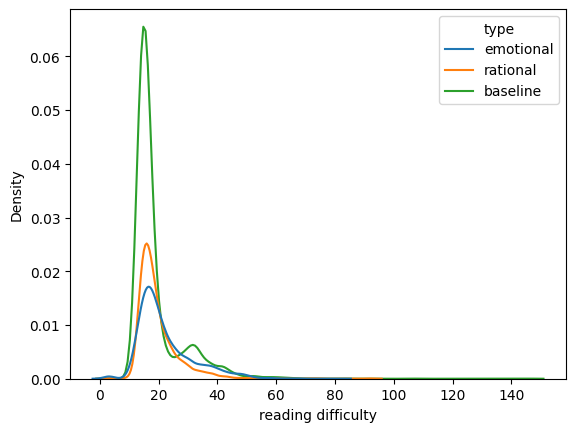

analytical
WilcoxonResult(statistic=np.float64(nan), pvalue=np.float64(nan))


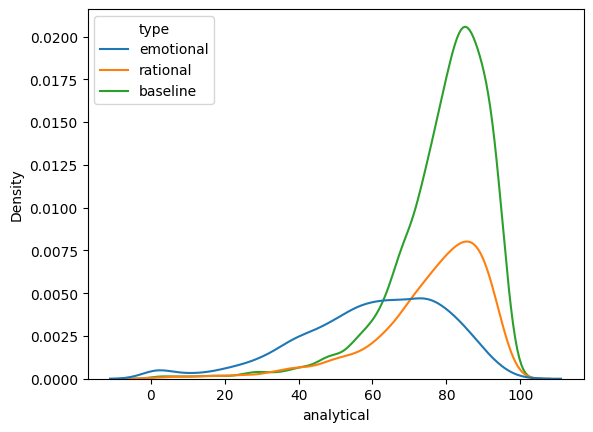

self references
WilcoxonResult(statistic=np.float64(nan), pvalue=np.float64(nan))


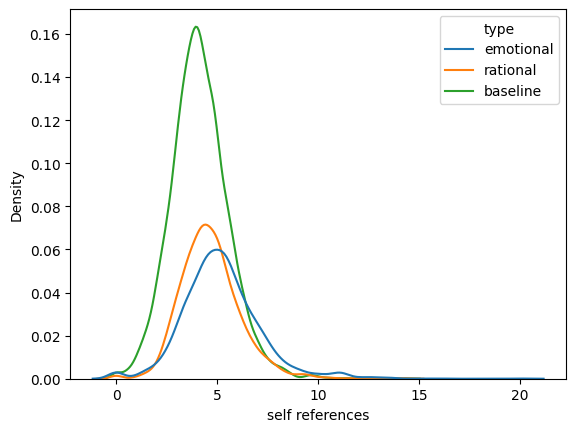

certainty
WilcoxonResult(statistic=np.float64(nan), pvalue=np.float64(nan))


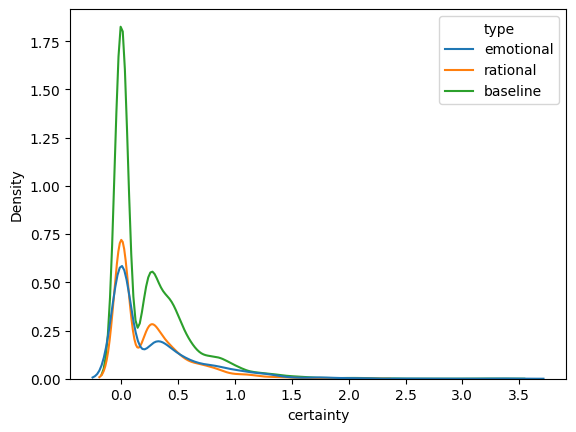

emotionality
WilcoxonResult(statistic=np.float64(nan), pvalue=np.float64(nan))


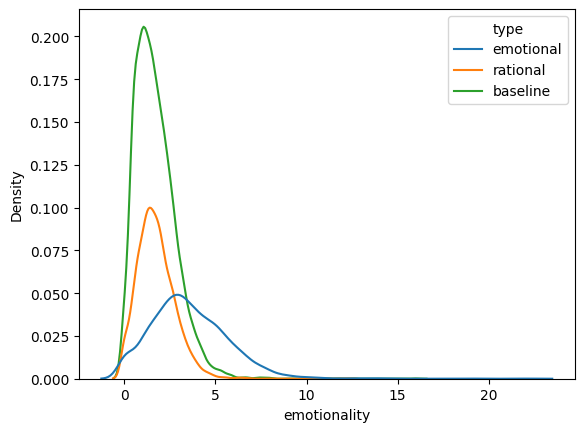

In [5]:
female = df[df["gender"] == "male"]
baseline["type"] = "baseline"
female = pd.concat([female, baseline], ignore_index=True)
for measure in (
    "lexical diversity",
    "reading difficulty",
    "analytical",
    "self references",
    "certainty",
    "emotionality",
):
    print(measure)
    print(
        wilcoxon(
            female[female["type"] == "rational"][measure],
            female[female["type"] == "emotional"][measure],
        )
    )
    sns.kdeplot(female, x=measure, hue="type")
    plt.show()

# wnioski:
- baseline różni się pod wieloma względami od poszczególnych typów zapytań
- odpowiedź baselineowa modelu do kobiet i mężczyzn jest bardziej podobna do racjonalnej niż emocjonalnej
- llm próbując emocjonalnie przekonać kobiety używa trudniejszych słów niż w stosunku do mężczyzn


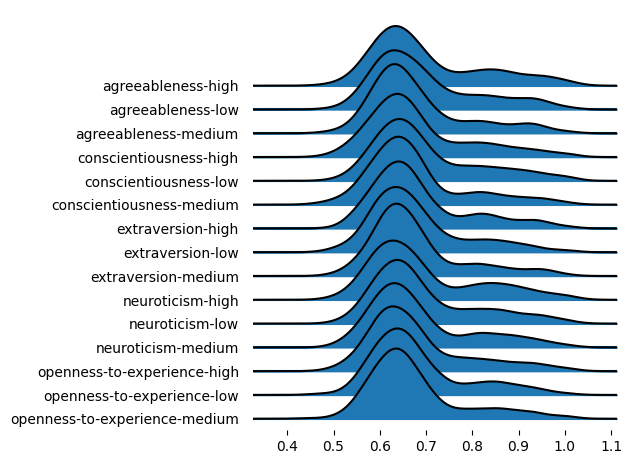

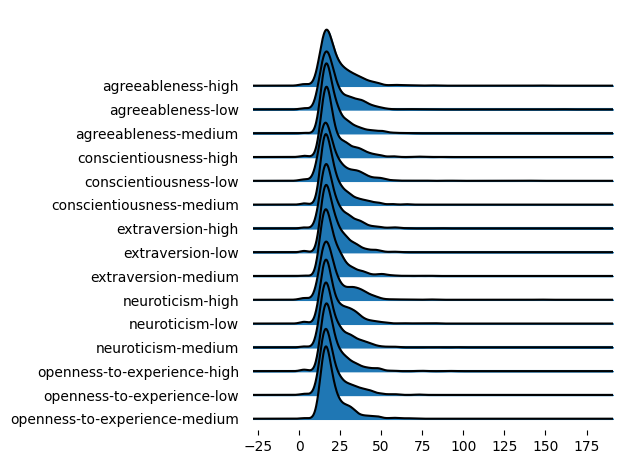

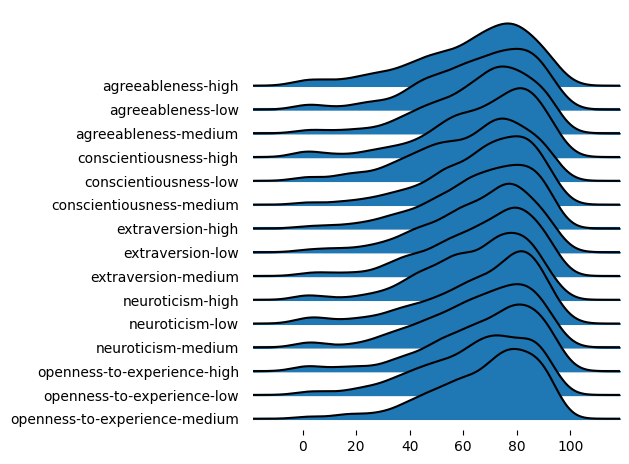

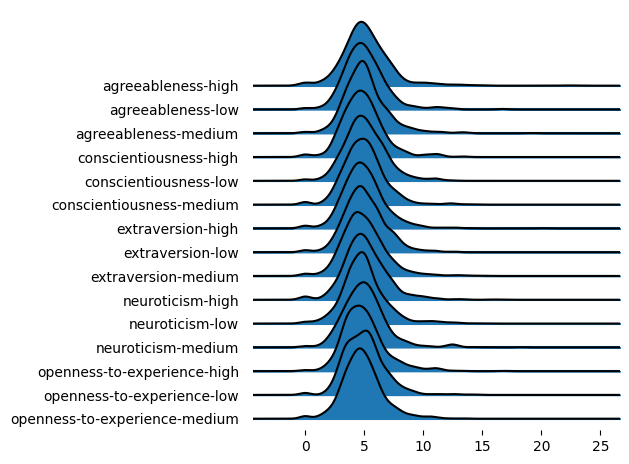

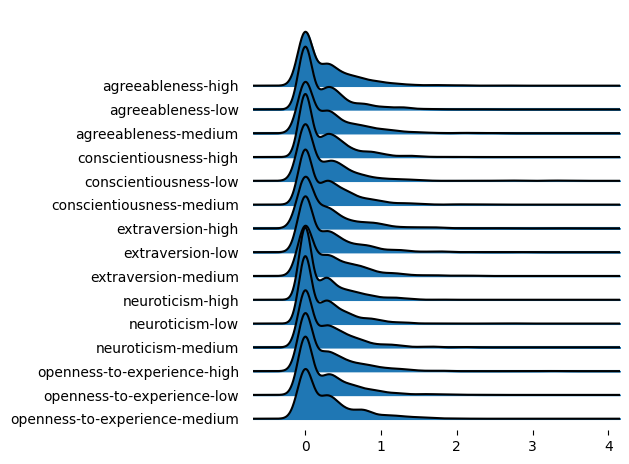

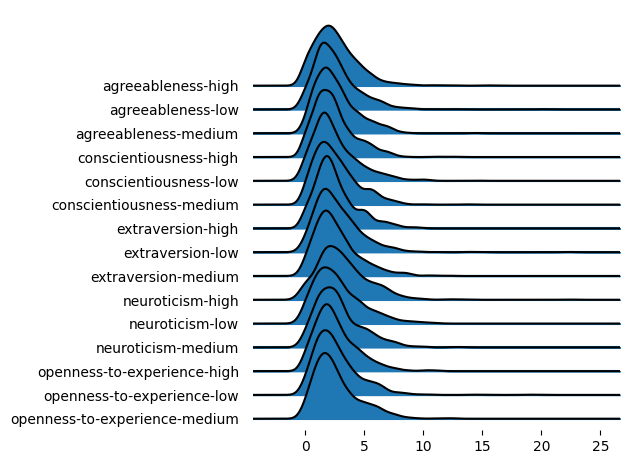

In [6]:
df["temp"] = df["trait"].str.replace(" ", "-") + "-" + df["level"]
for measure in (
    "lexical diversity",
    "reading difficulty",
    "analytical",
    "self references",
    "certainty",
    "emotionality",
):
    joypy.joyplot(df, by="temp", column=measure)
    plt.show()

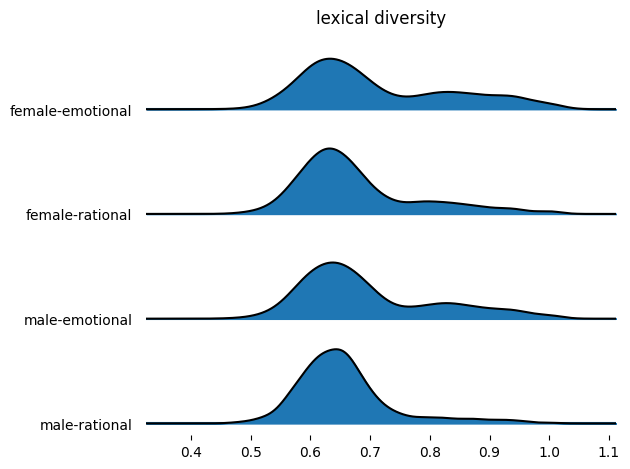

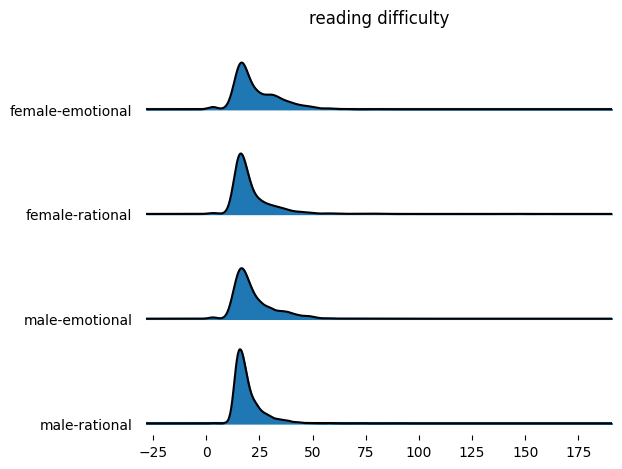

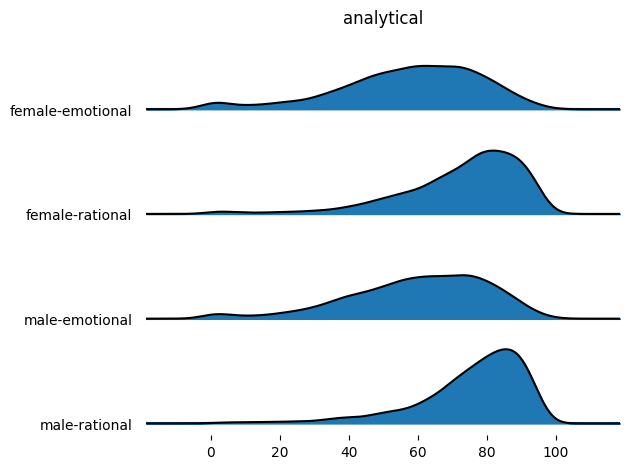

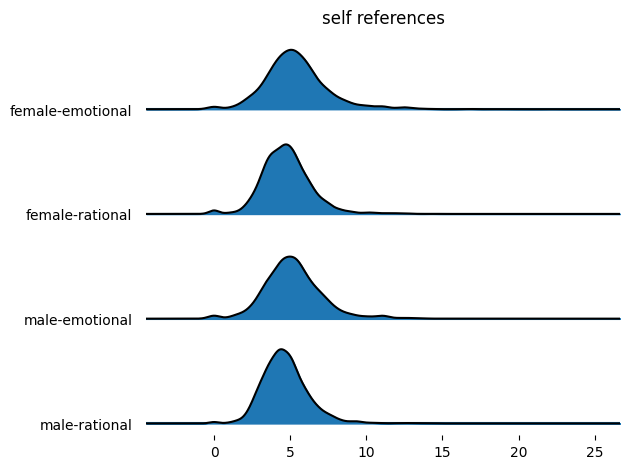

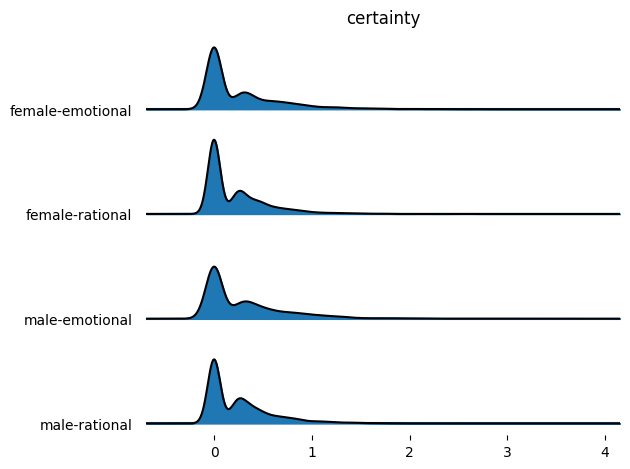

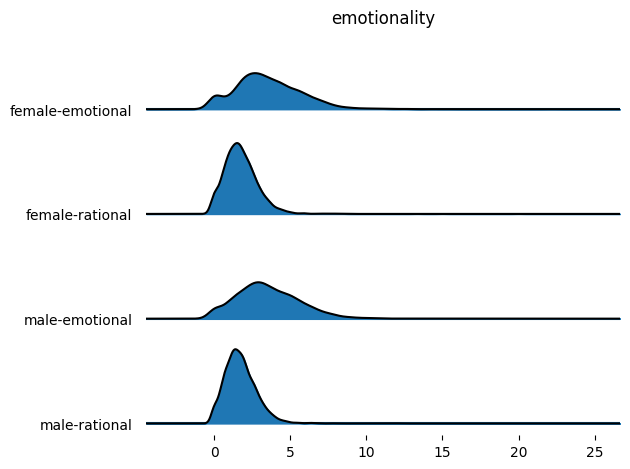

In [15]:
df["temp"] = df["gender"] + "-" + df["type"]
for measure in (
    "lexical diversity",
    "reading difficulty",
    "analytical",
    "self references",
    "certainty",
    "emotionality",
):
    joypy.joyplot(df, by="temp", column=measure)
    plt.title(measure)
    plt.tight_layout()
    plt.savefig(f"../img/joyplot_{measure.replace(' ', '_')}.png")